# Algoritmo Genético Básico

In [1]:
# import import_ipynb
# from algoritmos import *
from ipynb.fs.full.algoritmos import *
import csv

## Generación de semillas aleatorias

In [2]:
semilla = random.randint(0,9999999)

## Fichero ch130

geneticoBasico

Fichero: ch130
Tiempo de ejecución: 4.556137

-------- PARÁMETROS A. GENÉTICO ---------
Sembrar greedy:	 False
Tam población:	 60
k_torneo:	 30
Tam cruce:	 124
Prob mutación:	 0.02
Tam mutación:	 10
------------------------------------------
Mejor sol Coste: 35355 	 #It: 254 	 Semilla: 4009188
-----
Coste Media:	44078.650000
-----
Coste Mejor:	35355.000000


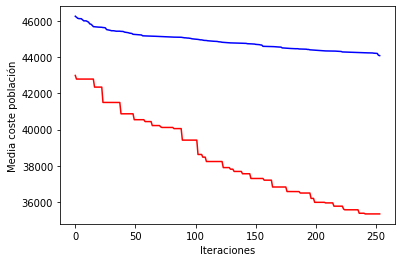

<Figure size 864x864 with 0 Axes>

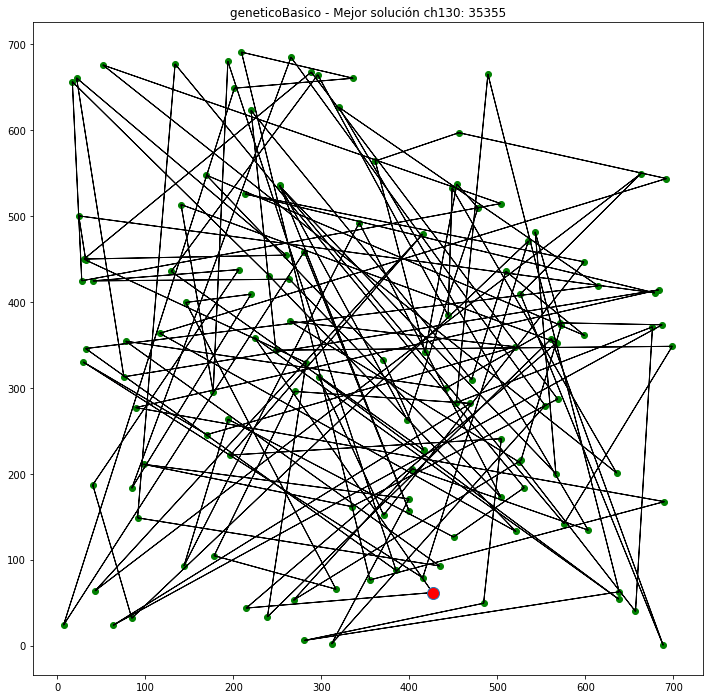

In [5]:
%matplotlib notebook
%matplotlib inline
fig, ax = plt.subplots(1,1)
plt.figure(figsize=(12,12)) 
ax.set_xlabel('Iteraciones') ; ax.set_ylabel('Media coste población')


algoritmo = "geneticoBasico"
print(algoritmo)
fichero = "ch130"
nodos = leeFichero(fichero)
distancias = getMDistancias(nodos)
    
print(f"\nFichero: {fichero}")

costes = []
it = []
mejorSolucion = []
mejorCoste = float('inf')

# Parámetros del algoritmo
num_nodos = len(nodos)    # Fichero
tam_poblacion = 60 # 30-100 individuos
k_torneo = round(0.5 * tam_poblacion) # Torneo selección, escogiendo k individuos aleatorios Presión/diversidad
tam_cruce = round(num_nodos * 0.95) # Num nodos a mantener del padre1 (Se mantiene mas del padre para no crear soluciones disruptivas)
prob_mutacion = 0.02 # Probabilidad de aplicar operador de mutación al hijo
tam_mutacion = round(num_nodos * 0.08) # Tamaño (num nodos) sublista a mutar 
sembrar_greedy = False # Plantar individuo solución algoritmo greedy
#########################

t = time.time()
with Pool(processes=8) as p:
       resultados = p.starmap(genetico_basico, product([semilla], [num_nodos], [distancias], [tam_poblacion], [k_torneo], [tam_cruce], [prob_mutacion], [tam_mutacion], [sembrar_greedy], [fig], [ax]))[0]

# resultados = genetico_basico(semilla, num_nodos, distancias, tam_poblacion, k_torneo, tam_cruce, prob_mutacion, tam_mutacion,  sembrar_greedy, fig, ax)
    
elapsed = time.time() - t
print("Tiempo de ejecución: %f\n" % elapsed )

poblacion = resultados[0]
mejorIndividuo = min(poblacion.individuos)
mejorSolucion = mejorIndividuo.camino
coste = mejorIndividuo.coste

print("-------- PARÁMETROS A. GENÉTICO ---------")
print("Sembrar greedy:\t", sembrar_greedy)
print("Tam población:\t", tam_poblacion)
print("k_torneo:\t", k_torneo)
print("Tam cruce:\t", tam_cruce)
print("Prob mutación:\t", prob_mutacion)
print("Tam mutación:\t", tam_mutacion)
print("------------------------------------------")


print("Mejor sol Coste: %s \t #It: %i \t Semilla: %s" % (coste, resultados[1], semilla) ) 
print("-----\nCoste Media:\t%f" % poblacion.media)
print("-----\nCoste Mejor:\t%f" % coste)

xs = resultados[2]
ys = resultados[3]
ys2 = resultados[4]
plt_dynamic(fig, xs, ys, ax)
plt_dynamic(fig, xs, ys2, ax, ['r'])

titulo = algoritmo + " - Mejor solución " + fichero + ": " + str(coste)
pintaCamino(mejorSolucion, nodos, titulo)

## Pruebas en lote

In [ ]:
algoritmo = "geneticoBasico"
print(algoritmo)
ficheros = ["st70", "ch130", "a280"]

# Resultados globales
resultadosCoste = [[] for x in range(len(ficheros))]
resultadosIt = [[] for x in range(len(ficheros))]

for i_fichero, fichero in enumerate(ficheros):
    
    print(f"\nFichero: {fichero}")
    nodos = leeFichero(fichero)
    distancias = getMDistancias(nodos)

    for ejecucion in range(5):
        
        semilla = random.randint(0,9999999)

        costes = []
        it = []
        mejorSolucion = []
        mejorCoste = float('inf')

        # Parámetros del algoritmo
        num_nodos = len(nodos)    # Fichero
        tam_poblacion = 60 # 30-100 individuos
        k_torneo = round(0.5 * tam_poblacion) # Torneo selección, escogiendo k individuos aleatorios Presión/diversidad
        tam_cruce = round(num_nodos * 0.95) # Num nodos a mantener del padre1 (Se mantiene mas del padre para no crear soluciones disruptivas)
        prob_mutacion = 0.02 # Probabilidad de aplicar operador de mutación al hijo
        tam_mutacion = round(num_nodos * 0.08) # Tamaño (num nodos) sublista a mutar 
        sembrar_greedy = False # Plantar individuo solución algoritmo greedy
        #########################

        with Pool(processes=8) as p:
               resultados = p.starmap(genetico_basico, product([semilla], [num_nodos], [distancias], [tam_poblacion], [k_torneo], [tam_cruce], [prob_mutacion], [tam_mutacion], [sembrar_greedy]))[0]

        # resultados = genetico_basico(semilla, num_nodos, distancias, tam_poblacion, k_torneo, tam_cruce, prob_mutacion, tam_mutacion,  sembrar_greedy, fig, ax)

        poblacion = resultados[0]
        mejorIndividuo = min(poblacion.individuos)
        mejorSolucion = mejorIndividuo.camino

        resultadosCoste[i_fichero].append(mejorIndividuo.coste)
        resultadosIt[i_fichero].append(resultados[1])
        
        print("\t%i) Mejor sol Coste: %s \t #It: %i \t Semilla: %s" % (ejecucion+1, mejorIndividuo.coste, resultados[1], semilla)) 
        
# Escribimos un fichero CSV
header = []
for fich in ficheros:
    header.append(fich+"-Coste")
    header.append(fich+"-EVs")

row_list = [header]
for x in range(5):
    row_list.append([])


for i in range(5):
    for fi, fich in enumerate(ficheros):
        row_list[i+1].append(resultadosCoste[fi][i])
        row_list[i+1].append(resultadosIt[fi][i])
        
nombre_fichero = 'geneticoBasico.csv'
with open(nombre_fichero, 'w', newline='') as file:
    writer = csv.writer(file, delimiter=';')
    writer.writerows(row_list)

    print("\Resultados guardados con éxito en: ", nombre_fichero)

geneticoBasico

Fichero: st70
